# Homoclinic trajectory of the Henon map

In [1]:
using Plots
using LinearAlgebra

1. Compute a homoclinic orbit of the Henon map at parameter values a=1.4, b=0.3. Try to get it with 1e-06 of the fixed point embedded in the attractor at both ends of the orbit. Print out both the sequence of x,y points on the orbit and the sequence of the distance of those points from the fixed point, and show a plot of the orbit against a backdrop of a long chaotic trajectory, and the stable and unstable manifolds of the fixed point. Plot a close-up of the fixed point to show the homoclinic orbit (approximately) starting and ending there. 

In [2]:
# function to evaluate the Jacobian of function f at point x
function Df(f,x)
    fx = f(x)
    m = length(fx)
    n = length(x)
    df = zeros(m,n)
    eps = 1e-07
    for j in 1:n
        x_eps = copy(x)
        x_eps[j] = x_eps[j] + eps
        fx_eps = f(x_eps)
        dfdx = (fx_eps-fx)/eps
        for i in 1:m
            df[i,j] = dfdx[i]
        end
    end
    df
end

# function to evaluate the eigenvalues and eigenvectors of A
# and ensure that output has the order
# stb eigval, unstb eigval, stb eigvect, unstb eigvect
function eigensort(A)
    Lambda, V = eigen(A)
    s,u = abs(Lambda[1]) < 1 ? (1,2) : (2,1) 
    return Lambda[s], Lambda[u], V[:,s], V[:,u]
end

# function to plot n interations of f operated on X
function plotfnX!(X, f, n; label="", color=:black, linestyle=:solid, width=1)
    fX = copy(X)
    for k=1:n
        fX = mapslices(f,fX,dims=2)
    end
    #fX = trim(fX)
    plot!(fX[:,1], fX[:,2], label=label, color=color, linestyle=linestyle, linewidth=width)
end

#function to provide 100 pts between two given points
function linesegment(P,Q, N=100)
    PQ = zeros(N,length(P))
    c = range(0, 1, length=N)
    for n=1:N
        PQ[n,:] = c[n]*P + (1-c[n])*Q
    end
    PQ
end


# The Henon map function
# Returns the function f which iterates a given x under
# the Henon map 
function henon_f(a,b)
    function f(x)
        [1+x[2]-a*x[1]*x[1]; b*x[1]]
    end
    return f
end

# Inverse of the Henon map
function henon_finv(a,b)
    function finv(x)
        [x[2]/b; x[1] - 1 + a*(x[2]/b)^2]
    end
    return finv
end

# A function to iterate the function f, n times, starting at x0
# the trajectory is stored in data
function fitr(f,n,x0,data=zeros(n,2))
    for i in 1:n
        data[i,1] = x0[1]
        data[i,2] = x0[2]
        x0 = f(x0)
    end
    return data
end

fitr (generic function with 2 methods)

## Plot the attractor

In [3]:
a = 1.4
b = 0.3
x0 = [0., 0.]
n = 1000
data = zeros(n,2)
f = henon_f(a,b)
finv = henon_finv(a,b)
data = fitr(f,n,x0,data)
fp1 = [(b-1 + sqrt((1-b)^2+4*a))/(2*a), 0.3*(b-1 + sqrt((1-b)^2+4*a))/(2*a)]
fp2 = [(b-1 - sqrt((1-b)^2+4*a))/(2*a), 0.3*(b-1 - sqrt((1-b)^2+4*a))/(2*a)]

2-element Array{Float64,1}:
 -1.1313544770895048
 -0.3394063431268514

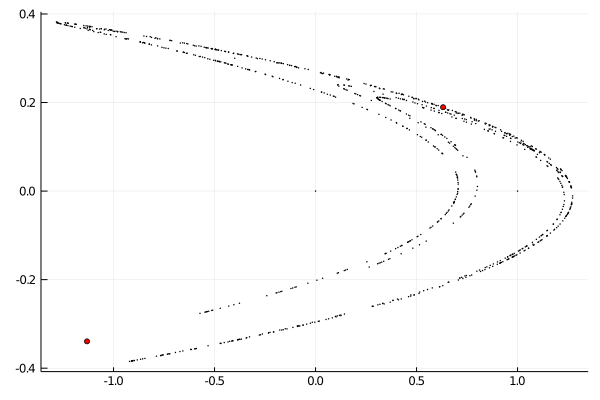

In [4]:
scatter(data[:,1],data[:,2],markershape = :circle, markersize = 1, markercolor = :black, legend=:false)
scatter!([(fp1[1],fp1[2]),(fp2[1],fp2[2])],markershape = :circle, markersize = 3, markercolor = :red, legend=:false)

## Plot the eigenvectors

(lambdas, lambdau) = (0.1559463119168303, -1.9237389863843024)


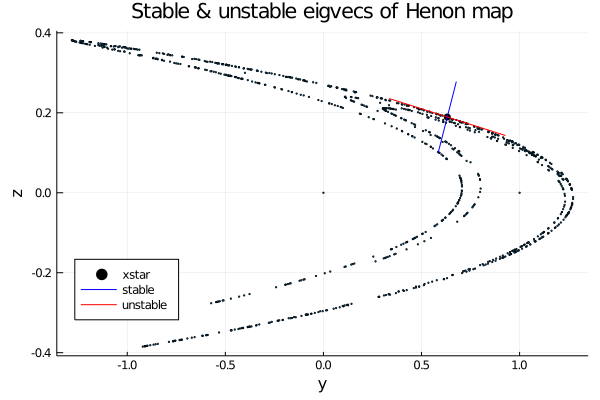

In [5]:
lambdas, lambdau, vs, vu = eigensort(Df(f,fp1))
@show lambdas, lambdau
xstar = fp1
r=0.3
Svec = linesegment(xstar + r/3*vs, xstar - r/3*vs, 2)
Uvec = linesegment(xstar + r*vu, xstar - r*vu, 2)

w0 = 1  # linewidths for fp0 and fp1 unstable manifolds
w1 = 2

scatter(data[:,1], data[:,2], markersize=1, label="")
scatter!([xstar[1]], [xstar[2]], markershape=:circ, label="xstar", color=:black)

plotfnX!(Svec, f, 0, label="stable", color=:blue, width=w0)
plotfnX!(Uvec, f, 0, label="unstable", color=:red, width=w0)

plot!(xlabel="y", ylabel="z", title="")
plot!(legend=:bottomleft)

plot!(title="Stable & unstable eigvecs of Henon map")

## Stable and unstable manifolds

(lambdas, lambdau) = (0.1559463119168303, -1.9237389863843024)


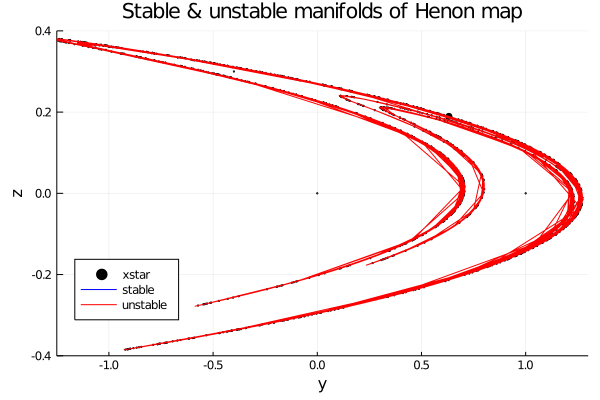

In [30]:
lambdas, lambdau, vs, vu = eigensort(Df(f,fp1))
@show lambdas, lambdau
xstar = fp1
r = 0.12
Svec = linesegment(xstar + r/3*vs, xstar - r/300*vs, 2000)
Uvec = linesegment(xstar + r*vu, xstar - r*vu, 5000)

w0 = 1  # linewidths for fp0 and fp1 unstable manifolds
w1 = 2
plot()
scatter(data[:,1], data[:,2], markersize=1, label="")
scatter!([xstar[1]], [xstar[2]], markershape=:circ, label="xstar", color=:black)

plotfnX!(Svec, finv, 5, label="stable", color=:blue, width=w0)
plotfnX!(Uvec, f, 15, label="unstable", color=:red, width=w0)
plot!(xlim=(-1.25,1.3), ylim=(-0.4,0.4))

plot!(xlabel="y", ylabel="z", title="")
plot!(legend=:bottomleft)

plot!(title="Stable & unstable manifolds of Henon map")

## Homoclinic orbit

xhomoguess = [0.338947, -0.2551]
dist = 0.00261278272430043


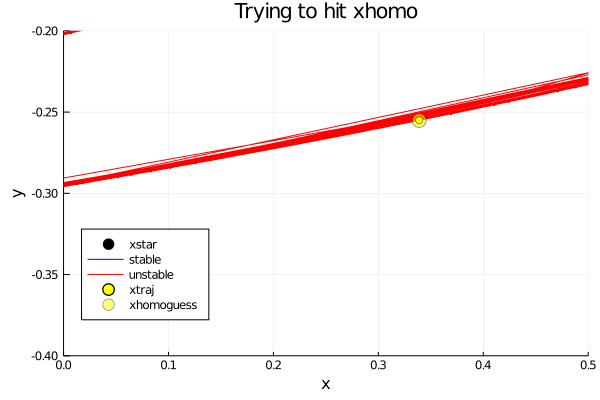

In [31]:
r0 = 1.0739e-5
x0 = fp1 + r0*vu

N = 20
# 3 iterations after 21 hit the fixed point
xtraj = zeros(N,2) 
fitr(f,N,x0,xtraj)

xhomoguess = xtraj[end, :]
dist = norm(f(f(f(xhomoguess))) - xstar)
@show xhomoguess
@show dist

scatter()
scatter(data[:,1], data[:,2], markersize=1, label="")
scatter!([xstar[1]], [xstar[2]], markershape=:circ, label="xstar", color=:black)

plotfnX!(Svec, finv, 5, label="stable", color=:blue, width=w0)
plotfnX!(Uvec, f, 15, label="unstable", color=:red, width=w0)

plot!(xlabel="x", ylabel="y", title="")
plot!(legend=:bottomleft)

scatter!(xtraj[:,1], xtraj[:,2], markershape=:circ, label="xtraj", color=:yellow)
scatter!([xhomoguess[1]], [xhomoguess[2]], markershape=:circ, markersize=8, label="xhomoguess", color=:yellow, opacity=0.5)
plot!(xlim=(0.0,0.5),ylim=(-0.4,-0.2))
plot!(title="Trying to hit xhomo")

In [32]:
r0 = 1.074e-5
dr = 1e-8
N = 20
# 3 iterations after 21 hit the fixed point
xtraj = zeros(N,2)
xstar = fp1

steps = 50
drdata = zeros(steps)
errdata = zeros(steps)

xhomoguess = xtraj[end, :]
err = norm(f(f(f(f(xhomoguess)))) - xstar)
i = 0;
old_err = err;

# Keep marching in r0 untill error starts increasing
# If error increases, march in opposite direction
# with a smaller step size

while i < steps
    r0 = r0 + dr
    x0 = fp1 + r0*vu
    xtraj = fitr(f,N,x0,xtraj)
    xhomoguess = xtraj[end, :]
    err = norm(f(f(f(f(xhomoguess)))) - xstar)
    if err > old_err
        dr = -0.5dr
    end
    old_err = err
    i = i + 1
    errdata[i] = err
    drdata[i] = dr
end
@show xhomoguess

xhomoguess = [0.338873, -0.25511]


2-element Array{Float64,1}:
  0.33887314825168824
 -0.2551099421818524 

errdata[end] = 0.00037024941168429203


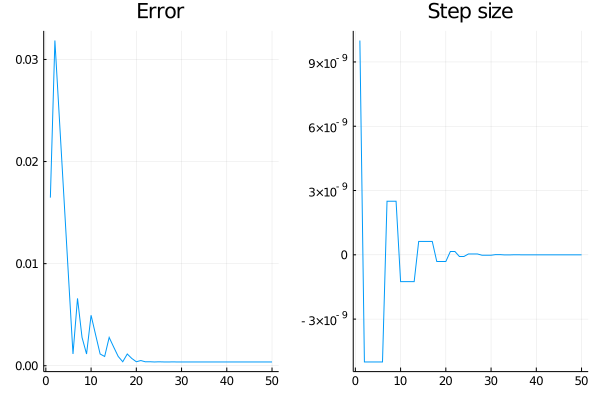

In [33]:
@show errdata[end]
s1 = plot(errdata,legend=false,title=:"Error")
s2 = plot(drdata,legend=false,title=:"Step size")
plot(s1,s2,layout=2)

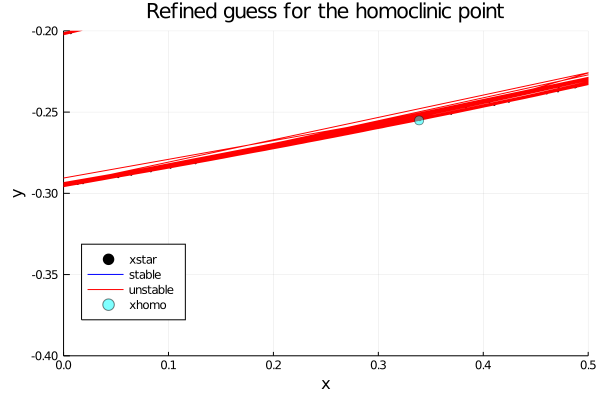

In [34]:
scatter()
scatter(data[:,1], data[:,2], markersize=1, label="")
scatter!([xstar[1]], [xstar[2]], markershape=:circ, label="xstar", color=:black)

plotfnX!(Svec, finv, 5, label="stable", color=:blue, width=w0)
plotfnX!(Uvec, f, 15, label="unstable", color=:red, width=w0)

plot!(xlabel="x", ylabel="y", title="")
plot!(legend=:bottomleft)

# scatter!(xtraj[:,1], xtraj[:,2], markershape=:circ, label="xtraj", color=:yellow)
scatter!([xhomoguess[1]], [xhomoguess[2]], markersize=5, markershape=:circ, label="xhomo", color=:cyan,opacity=0.5)
plot!(xlim=(0.0,0.5),ylim=(-0.4,-0.2))
plot!(title="Refined guess for the homoclinic point")

In [26]:
m = 25
xhomotraj=zeros(m,2)
xhomotraj=fitr(f,m,xhomoguess,xhomotraj);

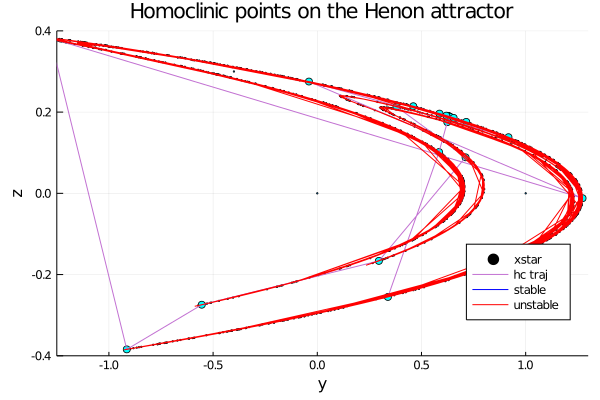

In [35]:
plot()
scatter(data[:,1], data[:,2], markersize=1, label="")
scatter!([xstar[1]], [xstar[2]], markershape=:circ, label="xstar", color=:black)
scatter!(xhomotraj[:,1],xhomotraj[:,2], color=:cyan, markersize=:4,label=:false)
plot!(xhomotraj[:,1],xhomotraj[:,2],label="hc traj")

plotfnX!(Svec, finv, 5, label="stable", color=:blue, width=w0)
plotfnX!(Uvec, f, 15, label="unstable", color=:red, width=w0)

plot!(xlabel="y", ylabel="z", title="")
plot!(legend=:bottomright)
plot!(xlim=(-1.25,1.3), ylim=(-0.4,0.4))

plot!(title="Homoclinic points on the Henon attractor")

## Lyapunov Exponents

2. Make a plot of the largest Lyapunov exponent of the Henon map as a function of parameter a, with fixed b=0.3. For the initial condition, use a small perturbation of the fixed point embedded in the attractor, in the direction of its unstable manifold.

In [36]:
# first let's calculate the largest Lyapunov exponent for fixed 'a'
# fix the parameters and define f to be the henon_map function

a = 1.2
b = 0.3
f = henon_f(a, b)

x0 = [0. ,0.]
dims = size(Df(f,x0),1)
m = 1000
Q = I
s = zeros(dims)
L = zeros(dims)

# at each point 
#  -evaluate Df(xi)*Q, where Q is the previous Q
#  -Do a QR decomposition
#  -add log|R[1,1]| to s[1] and log|R[2,2]| to s[2]
# then go to next point using x_i+1 = f(x_i)
# repeat

for k=1:m
    Q, R = qr(Df(f,x0)*Q)
    for j = 1:dims
        s[j] = s[j] + log(abs(R[j,j]))
    end
    x0 = f(x0)
end
L = s/m

@show s
@show L
@show maximum(L)

s = [308.375, -1512.35]
L = [0.308375, -1.51235]
maximum(L) = 0.3083754884713755


0.3083754884713755

In [37]:
# repeat the above algorithm for changing 'a'

x0 = [0., 0.] 
dims = size(Df(f,x0), 1)
m = 1000
b = 0.3
ainit = 0.
astep = 0.001
noOfSteps = 1500

Q0 = I
s = zeros(dims)
L = zeros(dims)
LvsA = zeros(noOfSteps, dims)
a = ainit
for i=1:noOfSteps
    s = zeros(dims)
    L = zeros(dims)
    f = henon_f(a, b)
    for k=1:m
        Q, R = qr(Df(f,x0)*Q0)
        for j = 1:dims
            s[j] = s[j] + log(abs(R[j,j]))
        end
        x0 = f(x0)
        Q0 = Q
    end
    L = s/m
    LvsA[i,1] = a
    LvsA[i,2] = maximum(L)
    a = a + astep
end

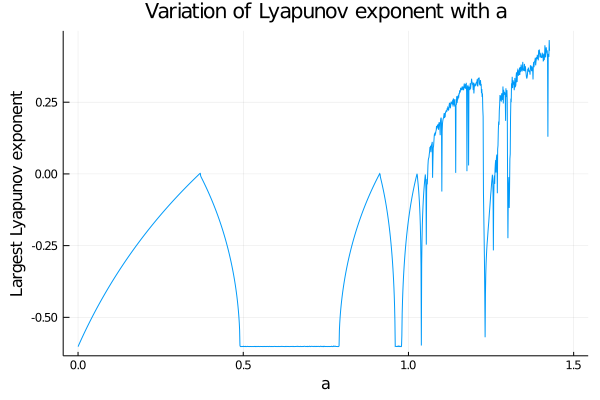

In [38]:
plot(LvsA[:,1], LvsA[:,2],title=:"Variation of Lyapunov exponent with a", xlabel=:"a",ylabel=:"Largest Lyapunov exponent",legend=:false)

***

<span style="color:gray">*Pulkit Dubey*</span>